In [15]:
%load_ext autoreload
%autoreload 2

from train import *
from models import *
from tools import load_data, get_label_dict, get_word_labels

from keras import optimizers
from keras.models import load_model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

from PIL import Image
from IPython.display import display

import numpy as np
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
X_train, y_train = load_data()
X_val, y_val = load_data("val")
X_test, _ = load_data("test")

y_train = to_categorical(y_train, 200)
y_val = to_categorical(y_val, 200)

Loading train data

Finished loading train data

Loading val data

Finished loading val data

Loading test data

Finished loading test data



In [17]:
labels = get_label_dict()
words = get_word_labels()

test_images = os.listdir("data/tiny-imagenet-200/test/images/")
assert len(X_test) == len(test_images)

Loading labels

Done

Loading words

Done



In [18]:
# Image preprocessing for the data
datagen = ImageDataGenerator(rotation_range=30, 
                             brightness_range=[0.3, 0.7], 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True, 
                             width_shift_range=0.2,
                             height_shift_range=0.2, 
                             channel_shift_range=90., 
                             fill_mode="reflect", 
                             preprocessing_function=shuffle_channels, 
                             rescale=1./255)

testgen = ImageDataGenerator(rescale=1./255)

data = {"train": (X_train, y_train), 
        "val": (X_val, y_val)}

In [19]:
model = BravoNet()
model_prefix = "models/" + model.name + "/" + model.name
model_path = model_prefix + ".h5"

Model: "BravoNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 2048)              23564800  
_________________________________________________________________
dense_2 (Dense)              (None, 200)               409800    
Total params: 23,974,600
Trainable params: 23,929,160
Non-trainable params: 45,440
_________________________________________________________________


In [20]:
# Checkpoint callback to save best model between epochs
checkpoint = ModelCheckpoint(model_path, 
                             monitor="val_accuracy", 
                             verbose=1, 
                             save_best_only=True, 
                             mode="auto", 
                             period=1)

cb_list = [checkpoint]

In [21]:
optim = optimizers.Adam(learning_rate=0.001)

history = train(model_path=model_path, 
                restore=False, 
                epochs=100,
                model=model, 
                optim=optim,
                datagen=datagen,
                data=data, 
                cb_list=cb_list)

Epoch 1/100
3125/3125 [==============================] - 270s 86ms/step - loss: 4.6798 - accuracy: 0.0530 - top3_accuracy: 0.1220 - top5_accuracy: 0.1752 - val_loss: 4.3559 - val_accuracy: 0.0744 - val_top3_accuracy: 0.1702 - val_top5_accuracy: 0.2443

Epoch 00001: val_accuracy improved from -inf to 0.07440, saving model to models/BravoNet/BravoNet.h5
Epoch 2/100
3125/3125 [==============================] - 260s 83ms/step - loss: 4.1027 - accuracy: 0.1181 - top3_accuracy: 0.2381 - top5_accuracy: 0.3183 - val_loss: 4.5671 - val_accuracy: 0.0981 - val_top3_accuracy: 0.2089 - val_top5_accuracy: 0.2808

Epoch 00002: val_accuracy improved from 0.07440 to 0.09810, saving model to models/BravoNet/BravoNet.h5
Epoch 3/100
3125/3125 [==============================] - 261s 84ms/step - loss: 3.8368 - accuracy: 0.1569 - top3_accuracy: 0.2978 - top5_accuracy: 0.3836 - val_loss: 4.3662 - val_accuracy: 0.1137 - val_top3_accuracy: 0.2294 - val_top5_accuracy: 0.3103

Epoch 00003: val_accuracy improved f


Epoch 00025: val_accuracy did not improve from 0.34990
Epoch 26/100
3125/3125 [==============================] - 255s 82ms/step - loss: 2.3940 - accuracy: 0.4193 - top3_accuracy: 0.6118 - top5_accuracy: 0.6930 - val_loss: 2.4558 - val_accuracy: 0.2938 - val_top3_accuracy: 0.4711 - val_top5_accuracy: 0.5533

Epoch 00026: val_accuracy did not improve from 0.34990
Epoch 27/100
3125/3125 [==============================] - 259s 83ms/step - loss: 2.3624 - accuracy: 0.4245 - top3_accuracy: 0.6179 - top5_accuracy: 0.7008 - val_loss: 4.2853 - val_accuracy: 0.2965 - val_top3_accuracy: 0.4650 - val_top5_accuracy: 0.5492

Epoch 00027: val_accuracy did not improve from 0.34990
Epoch 28/100
3125/3125 [==============================] - 254s 81ms/step - loss: 2.3413 - accuracy: 0.4286 - top3_accuracy: 0.6221 - top5_accuracy: 0.7031 - val_loss: 3.1602 - val_accuracy: 0.3311 - val_top3_accuracy: 0.5191 - val_top5_accuracy: 0.6080

Epoch 00028: val_accuracy did not improve from 0.34990
Epoch 29/100
3125


Epoch 00051: val_accuracy did not improve from 0.39440
Epoch 52/100
3125/3125 [==============================] - 256s 82ms/step - loss: 1.8036 - accuracy: 0.5395 - top3_accuracy: 0.7286 - top5_accuracy: 0.7982 - val_loss: 0.7378 - val_accuracy: 0.3960 - val_top3_accuracy: 0.5829 - val_top5_accuracy: 0.6606

Epoch 00052: val_accuracy improved from 0.39440 to 0.39600, saving model to models/BravoNet/BravoNet.h5
Epoch 53/100
3125/3125 [==============================] - 252s 81ms/step - loss: 1.7808 - accuracy: 0.5420 - top3_accuracy: 0.7331 - top5_accuracy: 0.8026 - val_loss: 3.1977 - val_accuracy: 0.3917 - val_top3_accuracy: 0.5714 - val_top5_accuracy: 0.6495

Epoch 00053: val_accuracy did not improve from 0.39600
Epoch 54/100
3125/3125 [==============================] - 251s 80ms/step - loss: 1.7608 - accuracy: 0.5464 - top3_accuracy: 0.7357 - top5_accuracy: 0.8057 - val_loss: 2.6019 - val_accuracy: 0.3591 - val_top3_accuracy: 0.5346 - val_top5_accuracy: 0.6136

Epoch 00054: val_accura

3125/3125 [==============================] - 260s 83ms/step - loss: 1.3692 - accuracy: 0.6312 - top3_accuracy: 0.8117 - top5_accuracy: 0.8693 - val_loss: 12.6392 - val_accuracy: 0.3838 - val_top3_accuracy: 0.5600 - val_top5_accuracy: 0.6422

Epoch 00078: val_accuracy did not improve from 0.39630
Epoch 79/100
3125/3125 [==============================] - 260s 83ms/step - loss: 1.3626 - accuracy: 0.6354 - top3_accuracy: 0.8130 - top5_accuracy: 0.8704 - val_loss: 3.5620 - val_accuracy: 0.3997 - val_top3_accuracy: 0.5808 - val_top5_accuracy: 0.6606

Epoch 00079: val_accuracy improved from 0.39630 to 0.39970, saving model to models/BravoNet/BravoNet.h5
Epoch 80/100
3125/3125 [==============================] - 263s 84ms/step - loss: 1.3505 - accuracy: 0.6402 - top3_accuracy: 0.8155 - top5_accuracy: 0.8718 - val_loss: 2.3215 - val_accuracy: 0.3821 - val_top3_accuracy: 0.5642 - val_top5_accuracy: 0.6419

Epoch 00080: val_accuracy did not improve from 0.39970
Epoch 81/100
3125/3125 [============

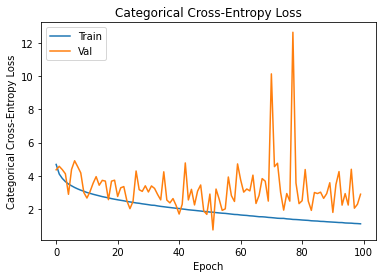

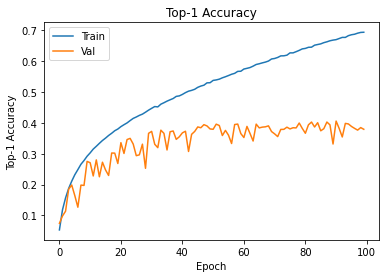

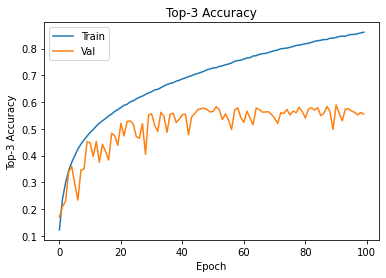

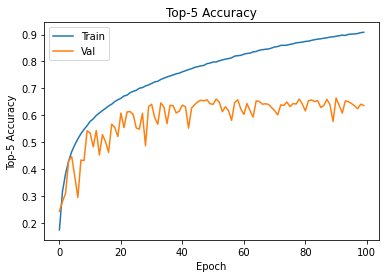

In [22]:
show_history(history)

In [23]:
# This loads the model and makes predictions on the test set
custom_metrics = {
    "top3_accuracy": top3_acc,
    "top5_accuracy": top5_acc
}
model = load_model(model_path, custom_objects=custom_metrics)
output = model.predict_generator(testgen.flow(X_test, shuffle=False))
results = []

for result in output:
    results.append(labels[np.argmax(result)])
    
assert len(results) == len(X_test)
print("Test images predicted:", len(results))

Test images predicted: 10000


In [24]:
# This writes the test set predictions to file
with open(model_prefix + " Predictions.txt", "w") as test_file:
    for i in range(len(results)):
        test_file.write(test_images[i] + " " + results[i] + "\n")
    print("Predictions saved at", test_file.name)

Predictions saved at models/BravoNet/BravoNet Predictions.txt


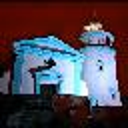

['freight', 'car']


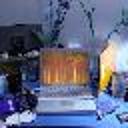

['lawn', 'mower,', 'mower']


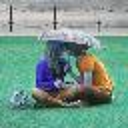

['go-kart']


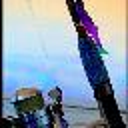

['flagpole,', 'flagstaff']


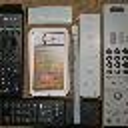

['brass,', 'memorial', 'tablet,', 'plaque']


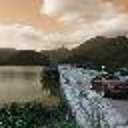

['lakeside,', 'lakeshore']


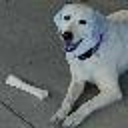

['golden', 'retriever']


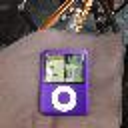

['birdhouse']


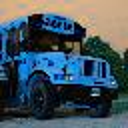

['school', 'bus']


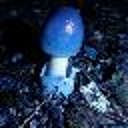

['mushroom']


In [25]:
# This shows some test set images and the model's predictions on them
display_dim = 128
for _ in range(10):
    index = np.random.randint(len(X_test))
    img = Image.fromarray(X_test[index], "RGB").resize(size=(display_dim, display_dim))
    word_label = words[results[index]]
    display(img)
    print(word_label)

In [26]:
# This saves an HTML version of the notebook for later viewing
os.system("%notebook 'Training'")
os.system("jupyter nbconvert --to html Training.ipynb")

html_path = model_prefix + ".html"
if path.exists(html_path):
    os.remove(html_path)
os.rename("Training.html", html_path)